<a href="https://colab.research.google.com/github/Shubhangani-Tiwari/Play-Store--Apps-Reviews-Project/blob/main/Demand_prdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df=pd.read_csv('/content/drive/MyDrive/Nairobi Transport Data.zip')
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


In [80]:
df.shape

(51645, 10)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [82]:
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [83]:
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [84]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [85]:
df['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

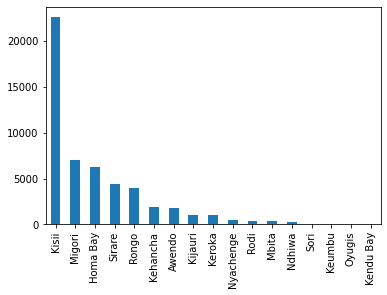

In [86]:
df['travel_from'].value_counts().plot(kind='bar')
plt.show()

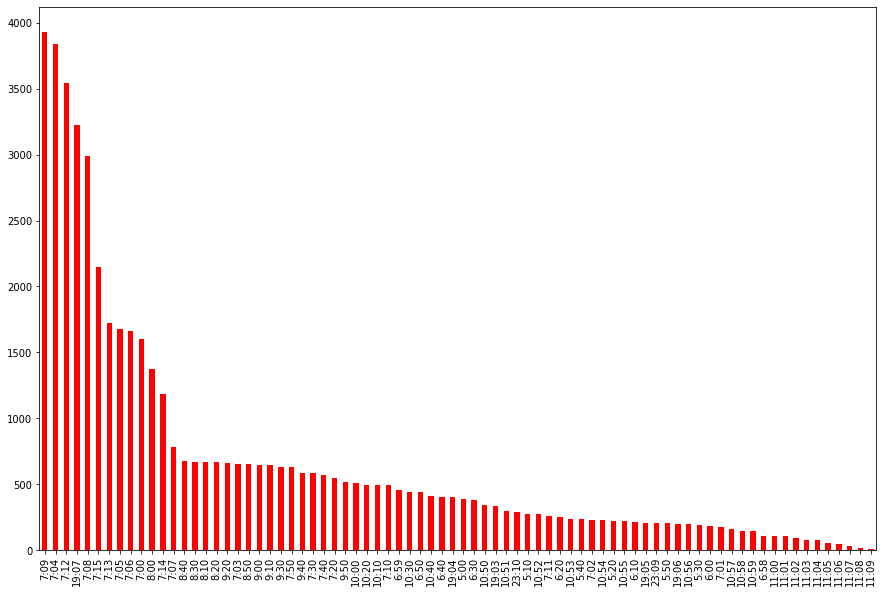

In [87]:
df['travel_time'].value_counts().plot(kind='bar',figsize=(15,10),color ='red')
plt.show()

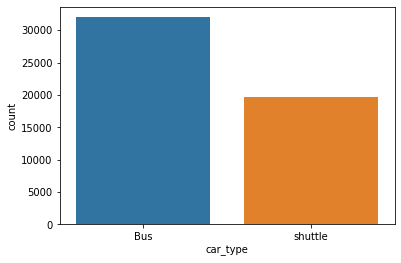

In [88]:
sns.countplot(df['car_type'])
plt.show()

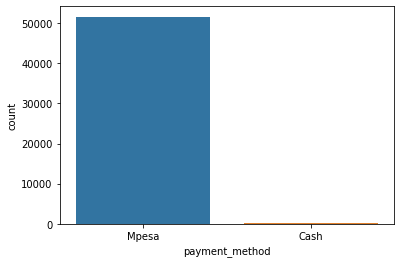

In [89]:
sns.countplot(df['payment_method'])
plt.show()

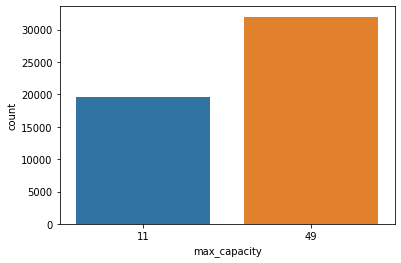

In [90]:
sns.countplot(df['max_capacity'])
plt.show()

In [91]:
df['ride_id'].value_counts()

8454     50
13211    49
10834    49
8090     49
11382    49
         ..
10090     1
10091     1
10114     1
10116     1
14304     1
Name: ride_id, Length: 6249, dtype: int64

Since there are total 61645 rows i.e 61645 bookings but only 6249 unique ride_id. This implies that there are more than one seats have booked by single ride_id.

So in order to find the total seat_booking we need to count the different seat numbers corresponding to  single ride_id.

In [92]:
df.groupby(['ride_id']).seat_number.count()

ride_id
1442      1
5437      1
5710      1
5777      5
5778     31
         ..
20113     9
20114     4
20115     5
20116     1
20117     1
Name: seat_number, Length: 6249, dtype: int64

In [93]:
totl_tickit=df.groupby(['ride_id']).seat_number.count().rename("number_of_tickit").reset_index()

In [94]:
df=df.drop_duplicates('ride_id')

In [95]:
df.shape

(6249, 10)

In [96]:
df =df.merge(totl_tickit,on= 'ride_id')
df.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickit
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31
5,5781,22A,Mpesa,VGG7Q3MVJX,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
6,5784,1X,Mpesa,3OPU23FHRB,20-04-18,5:10,Kisii,Nairobi,shuttle,11,1
7,5789,1X,Mpesa,BPRX4UMFFN,20-04-18,9:50,Kisii,Nairobi,shuttle,11,1
8,5790,1B,Mpesa,DC8ABRSXXK,20-04-18,7:06,Kisii,Nairobi,Bus,49,2
9,5791,1,Mpesa,HGQURN0SZS,20-04-18,6:00,Kisii,Nairobi,shuttle,11,1


In [97]:
df.drop(['seat_number','payment_receipt','payment_method','travel_to'],axis=1)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit
0,1442,17-10-17,7:15,Migori,Bus,49,1
1,5437,19-11-17,7:12,Migori,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5
4,5778,27-11-17,7:12,Migori,Bus,49,31
...,...,...,...,...,...,...,...
6244,13812,20-04-18,23:10,Ndhiwa,Bus,49,11
6245,13813,20-04-18,7:05,Ndhiwa,Bus,49,11
6246,13825,20-04-18,7:09,Rongo,Bus,49,1
6247,13826,20-04-18,8:00,Awendo,Bus,49,1


In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
x= df.drop(['number_of_tickit'],axis=1)
y = df['number_of_tickit']

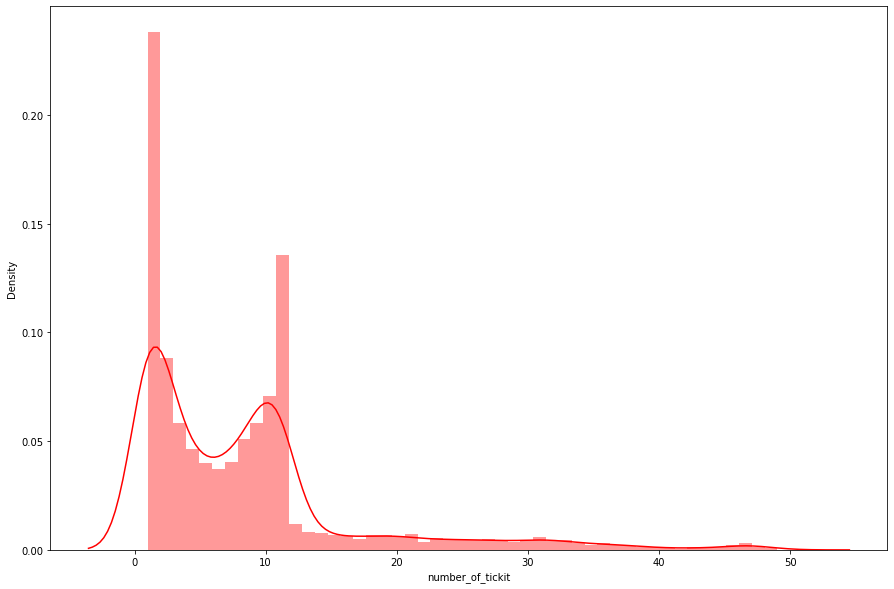

In [100]:
#Let's check the distribution of dependent variable (number_of_tickit)
plt.figure(figsize=(15,10))
sns.distplot(df['number_of_tickit'],color='r')

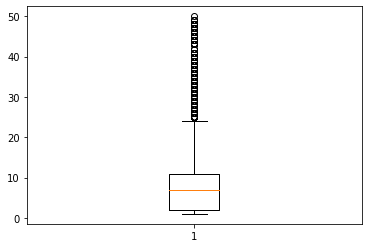

In [101]:
plt.boxplot(df['number_of_tickit'])
plt.show()

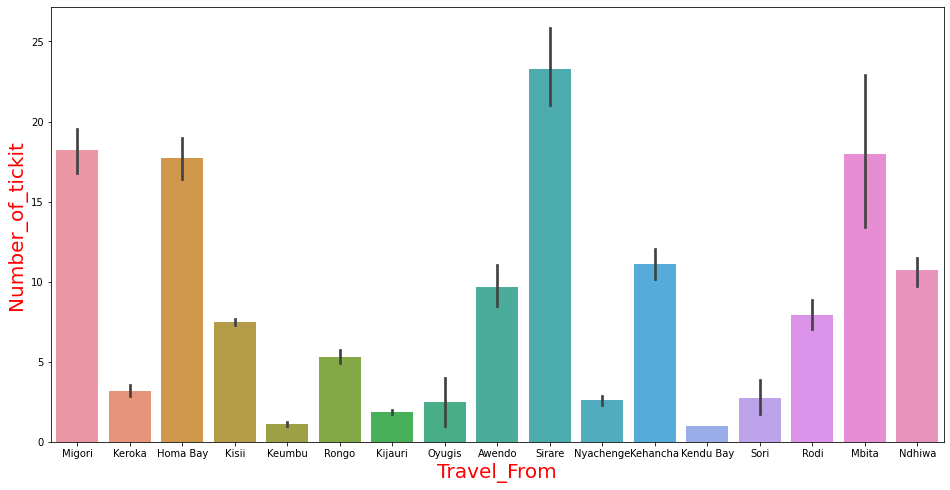

In [102]:
#plt.figure(figsize=(18,15))
#sns.scatterplot(x = df['travel_from'],y=df['number_of_tickit'])
plt.figure(figsize=(16,8))
sp=sns.barplot(x='travel_from',y='number_of_tickit',data=df)
plt.xlabel('Travel_From',color='r',fontsize=20)
plt.ylabel('Number_of_tickit',color='r',fontsize=20)
plt.show()

In [104]:
df["date"]=df["travel_date"]+ " "+df["travel_time"]
df["date"]

0        17-10-17 7:15
1        19-11-17 7:12
2        26-11-17 7:05
3        27-11-17 7:10
4        27-11-17 7:12
             ...      
6244    20-04-18 23:10
6245     20-04-18 7:05
6246     20-04-18 7:09
6247     20-04-18 8:00
6248     14-11-17 5:10
Name: date, Length: 6249, dtype: object

In [105]:
def  time_features(df1): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df1["date"]=pd.to_datetime(df1["date"])
  df1["day_of_week"]=df1["date"].dt.dayofweek
  df1["day_of_year"]=df1["date"].dt.dayofyear
  df1["day_of_month"]=df1["date"].dt.day
  df1["year_woy"]=df1["date"].dt.year.astype(str)+df1["date"].dt.weekofyear.astype(str)
  df1["hour"]=df1["date"].dt.hour
  df1["minute"]=df1["date"].dt.minute
  df1["is_weekend"]=df1["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df1["year"]=df1["date"].dt.year
  df1["quarter"]=df1["date"].dt.quarter
  df1["month"]=df1["date"].dt.month
  return df1

In [114]:
df_new = time_features(df)
df_new.shape

(6249, 22)

In [115]:
df_new=df_new.drop(['seat_number','payment_method','payment_receipt','travel_to'],axis=1)

In [116]:
df_new.head(10)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11
5,5781,27-11-17,7.150000,Homa Bay,Bus,49,26,2017-11-27 07:09:00,0,331,27,201748,7,9,0,2017,4,11
6,5784,20-04-18,5.166667,Kisii,shuttle,11,1,2018-04-20 05:10:00,4,110,20,201816,5,10,0,2018,2,4
7,5789,20-04-18,9.833333,Kisii,shuttle,11,1,2018-04-20 09:50:00,4,110,20,201816,9,50,0,2018,2,4
8,5790,20-04-18,7.100000,Kisii,Bus,49,2,2018-04-20 07:06:00,4,110,20,201816,7,6,0,2018,2,4
9,5791,20-04-18,6.000000,Kisii,shuttle,11,1,2018-04-20 06:00:00,4,110,20,201816,6,0,0,2018,2,4


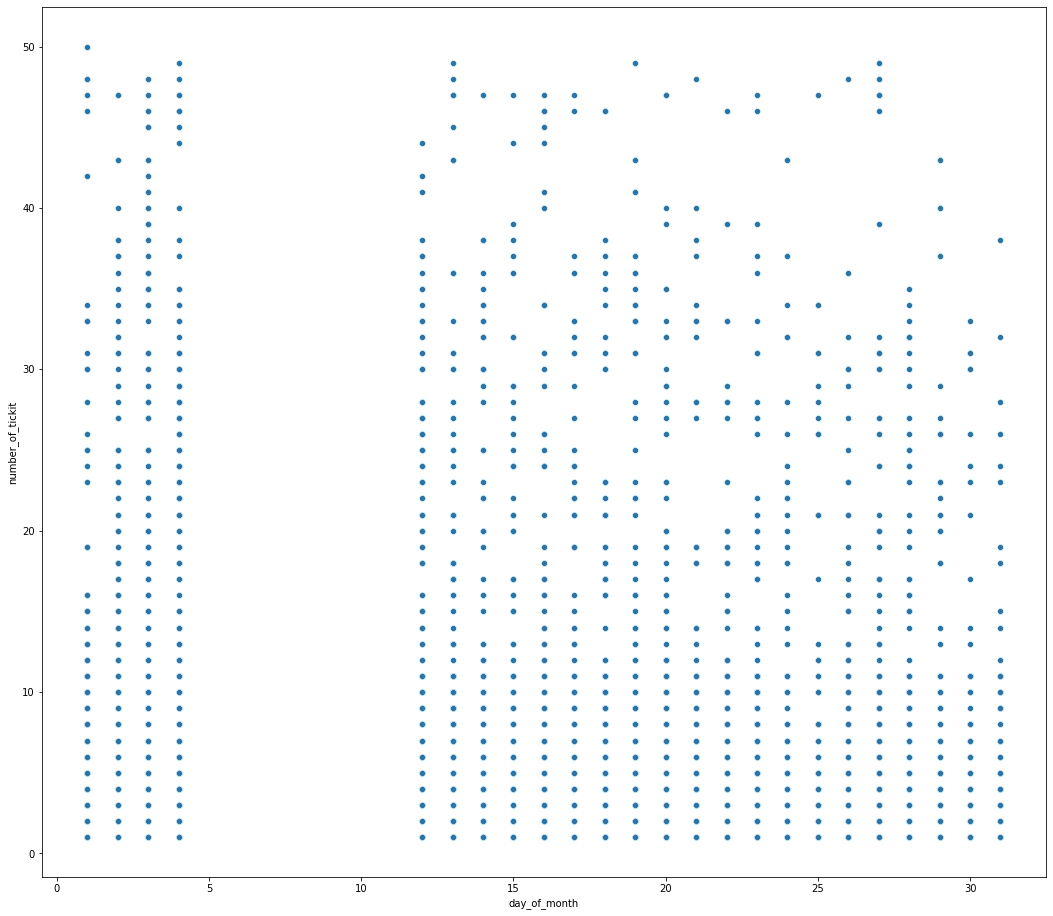

In [117]:
plt.figure(figsize=(18,16))
sns.scatterplot(x='day_of_month',y='number_of_tickit',data=df_new)

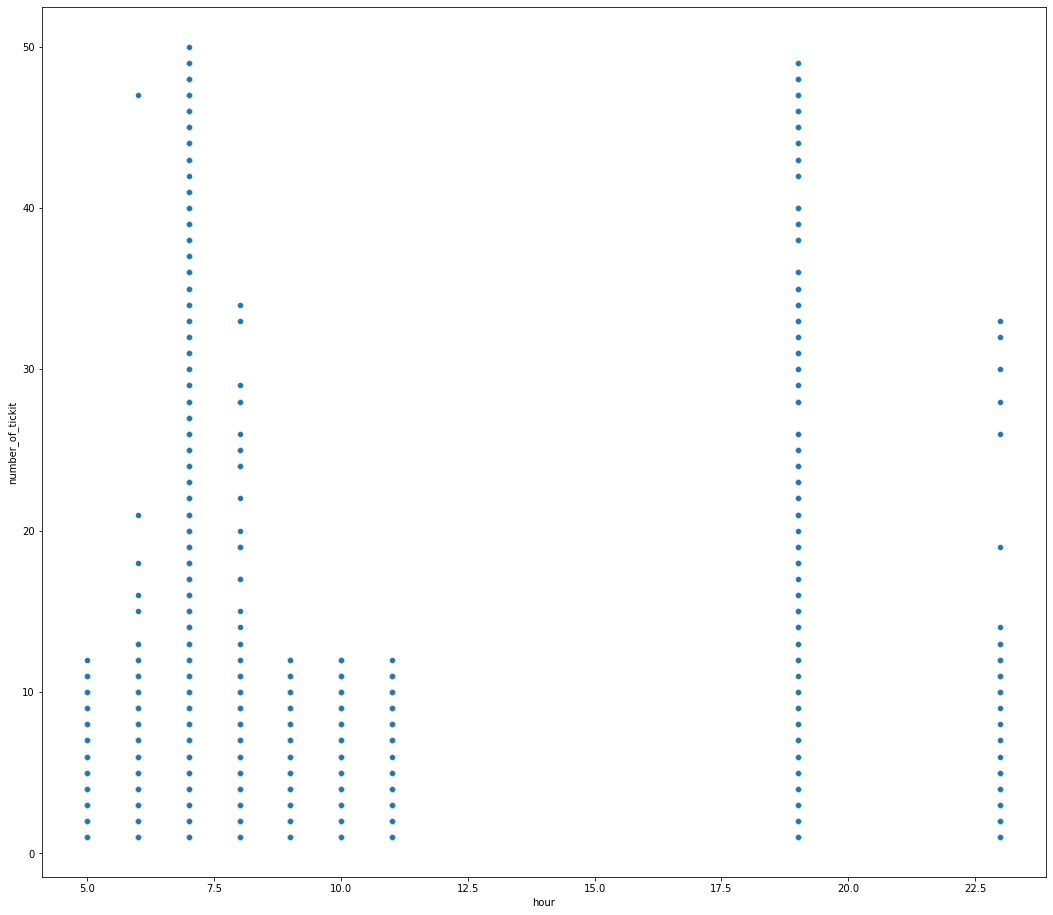

In [118]:
plt.figure(figsize=(18,16))
sns.scatterplot(x='hour',y='number_of_tickit',data=df_new)

In [111]:
df["travel_time"] = df["travel_time"].str.split(':').apply(lambda x: int(x[0]) + (int(x[1])/60))

In [119]:
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


In [120]:
df_new['period'] = np.nan
df_new.loc[df_new.travel_time < 7, 'period'] = 'em'
df_new.loc[(df_new.travel_time >= 7) & (df_new.travel_time < 11), 'period'] = 'am'
df_new.loc[(df_new.travel_time >= 11) & (df_new.travel_time < 15), 'period'] = 'mid'
df_new.loc[(df_new.travel_time >= 15) & (df_new.travel_time < 19), 'period'] = 'eve'
df_new.loc[(df_new.travel_time >= 19) & (df_new.travel_time <= 24), 'period'] = 'pm'

In [121]:
pcount = dict(df_new['period'].value_counts())
pcount


df_new['hourly_travelers'] = np.log1p(df_new['period'].map(pcount))



dcount = dict(df_new["day_of_year"].value_counts())
df_new["daily_travelers"] = np.log1p(df_new["day_of_year"].map(dcount))
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,11,am,8.494743,3.871201


In [123]:
df_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_tickit', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'year_woy', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month', 'period', 'hourly_travelers',
       'daily_travelers'],
      dtype='object')

In [124]:
df_new.month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: month, dtype: int64

In [125]:
#encoding the car type category data
df_new["car_type"] = pd.Categorical(df_new["car_type"])
car_type_categories = df_new.car_type.cat.categories
df_new["car_type"] = df_new.car_type.cat.codes

In [126]:
#encoding the travel from category data
df_new["travel_from"] = pd.Categorical(df_new["travel_from"])
travel_from_categories = df_new.travel_from.cat.categories
df["travel_from"] = df_new.travel_from.cat.codes

In [127]:
#encoding the period
df_new["period"] = pd.Categorical(df_new["period"])
period_categories = df_new.period.cat.categories
df_new["period"] = df_new.period.cat.codes

In [128]:
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,0,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,10,0,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,0,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,11,0,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,0,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,11,0,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,0,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,11,0,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,0,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,11,0,8.494743,3.871201
